## DATA VISUALIZATION AND DATA ANALYSIS

In [2]:
!pip install seaborn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
df = pd.read_csv('Dataset.csv')
df.head()

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air_temperature ', 'Process_temperature ',
       'Rotational_speed ', 'Torque ', 'Tool_wear ', 'Target', 'Failure_Type'],
      dtype='object')

In [5]:
del df['UDI']
del df['Product ID']
del df['Target']

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Failure_Type','Type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

<Axes: xlabel='Process_temperature ', ylabel='count'>

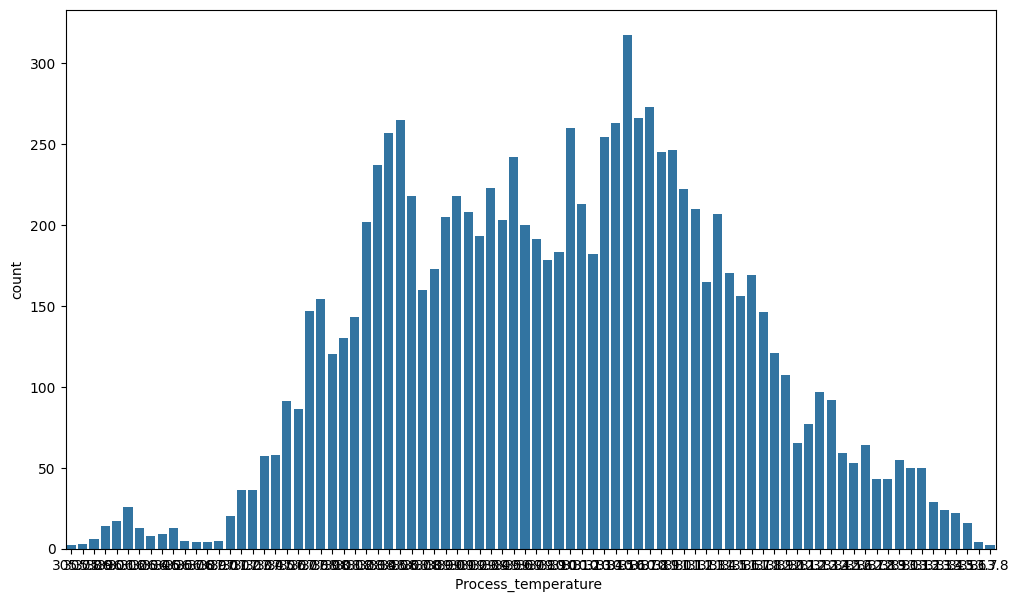

In [7]:
plt.figure(figsize=(12,7))
sns.countplot(x='Process_temperature ',data=df)

(array([1003.,    0.,    0.,    0.,    0., 6000.,    0.,    0.,    0.,
        2997.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

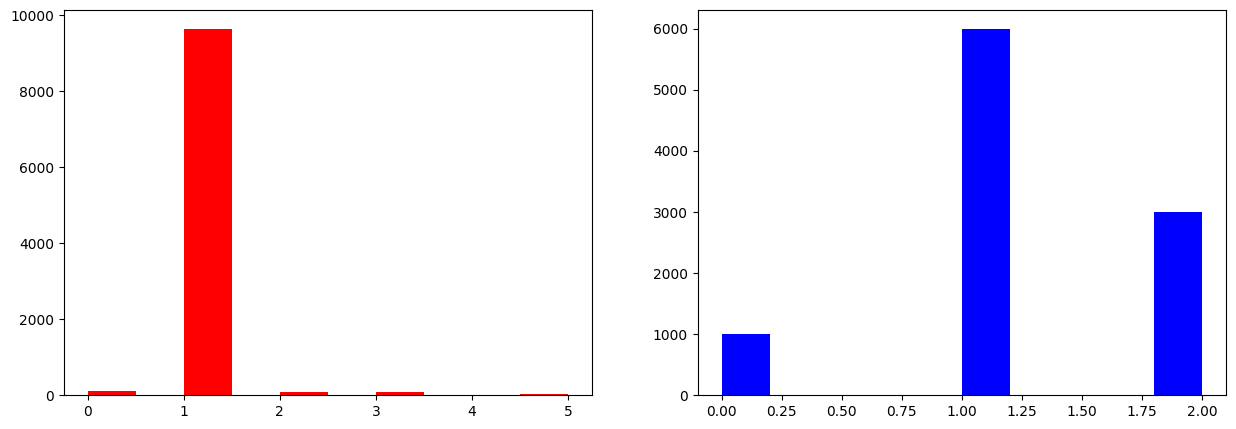

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df['Failure_Type'],color='red')

plt.subplot(1,2,2)
plt.hist(df['Type'],color='blue')


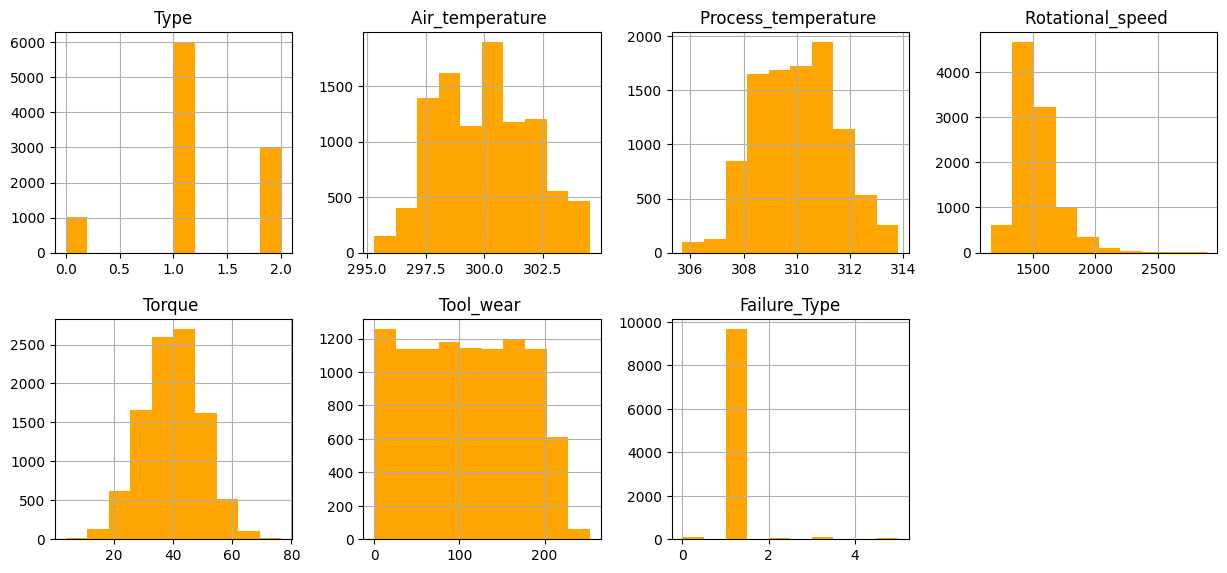

In [9]:
df.hist(figsize=(15,55),layout=(15,4), color='orange')
plt.show()

({'whiskers': [<matplotlib.lines.Line2D at 0x1ea1709f250>,
  'caps': [<matplotlib.lines.Line2D at 0x1ea1709f790>,
  'boxes': [<matplotlib.lines.Line2D at 0x1ea1708ff70>],
  'medians': [<matplotlib.lines.Line2D at 0x1ea1709fcd0>],
  'fliers': [<matplotlib.lines.Line2D at 0x1ea1709ff70>],
  'means': []},)

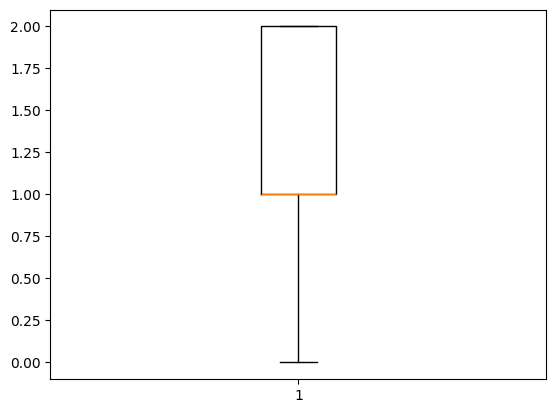

In [10]:
plt.boxplot(df["Type"]),

<Axes: ylabel='Density'>

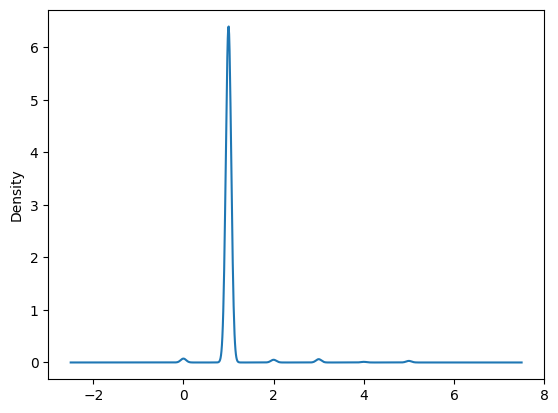

In [11]:
df['Failure_Type'].plot(kind='density')

<Axes: ylabel='Process_temperature '>

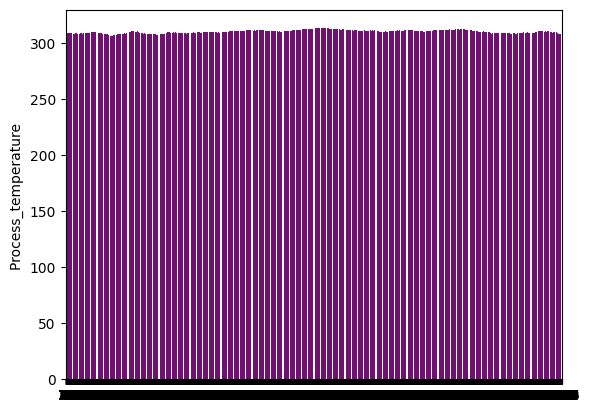

In [12]:
sns.barplot(df['Process_temperature '], color='purple') 
# barplot, boxenplot, boxplot, countplot, displot, distplot, ecdfplot, histplot, kdeplot, pointplot, violinplot, stripplot

<Axes: >

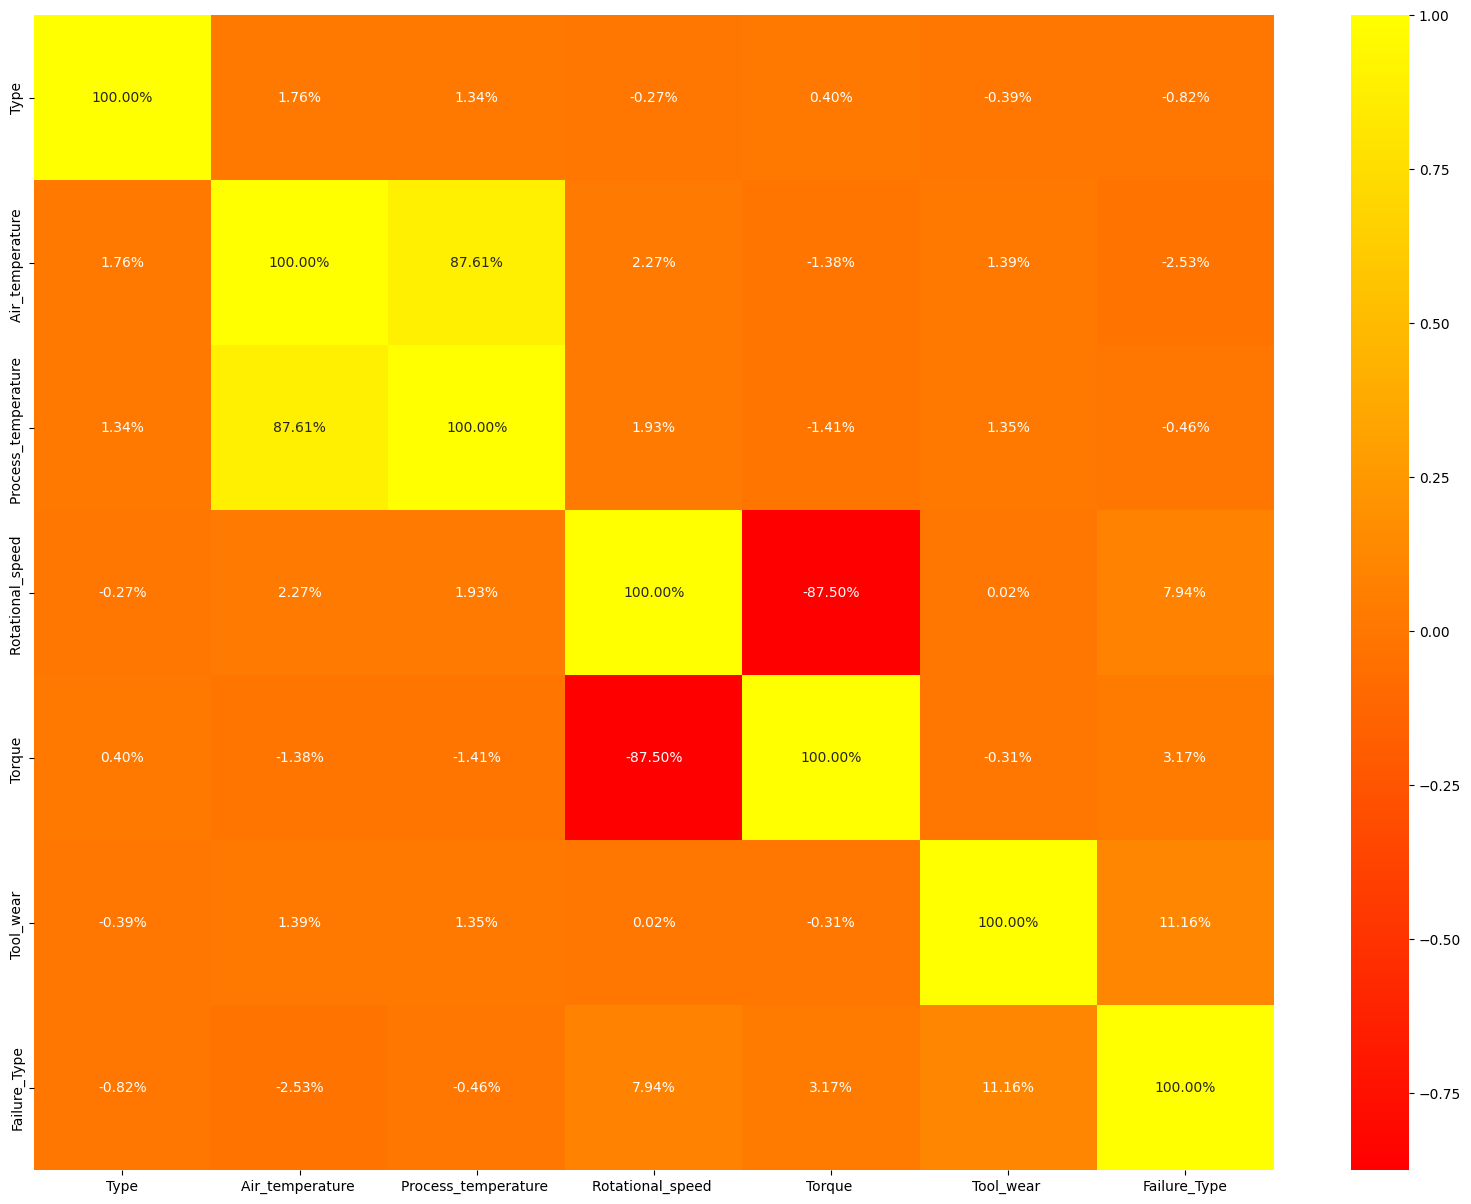

In [13]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot = True, fmt='0.2%',cmap = 'autumn',ax=ax)

Failure_Type
1    96.52
0     1.12
3     0.95
2     0.78
5     0.45
4     0.18
Name: count, dtype: float64

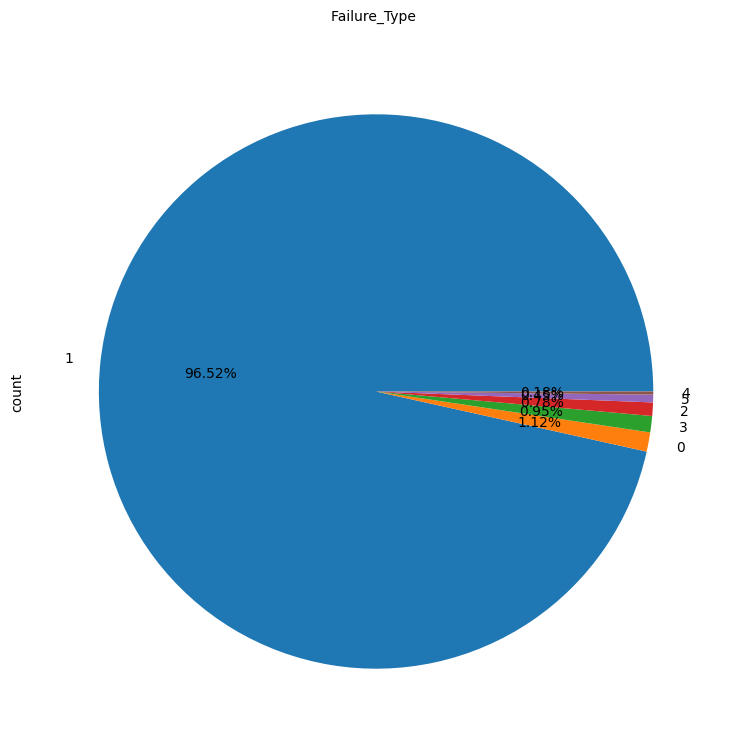

In [14]:
def plot(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return np.round(dataframe_pie/df.shape[0]*100,2)

plot(df, 'Failure_Type')